## **Predicting Housing Prices for regions in the USA.**

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

In [84]:
# importing librarires
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [85]:
# loading csv data to dataframe 
USA_Housing = pd.read_csv('data/USA_Housing.csv')
# checking out the Data
USA_Housing.head()


Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\r\nLaurabury, NE 37...  
1  188 Johnson Views Suite 079\r\nLake Kathleen, ...  
2  9127 Elizabeth Stravenue\r\nDanieltown, WI 064...  
3                        USS Barnett\r\nFPO AP 44820  
4                       USNS Raymond\r\nFPO AE 09386

In [86]:
#checking columns and total records
USA_Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


 **Generating descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN value.
**

In [87]:
USA_Housing.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

## **Exploratory Data Analysis**


**Visualizing the Entire Data using pairplot**

Exploring types of relationship across the entire dataset

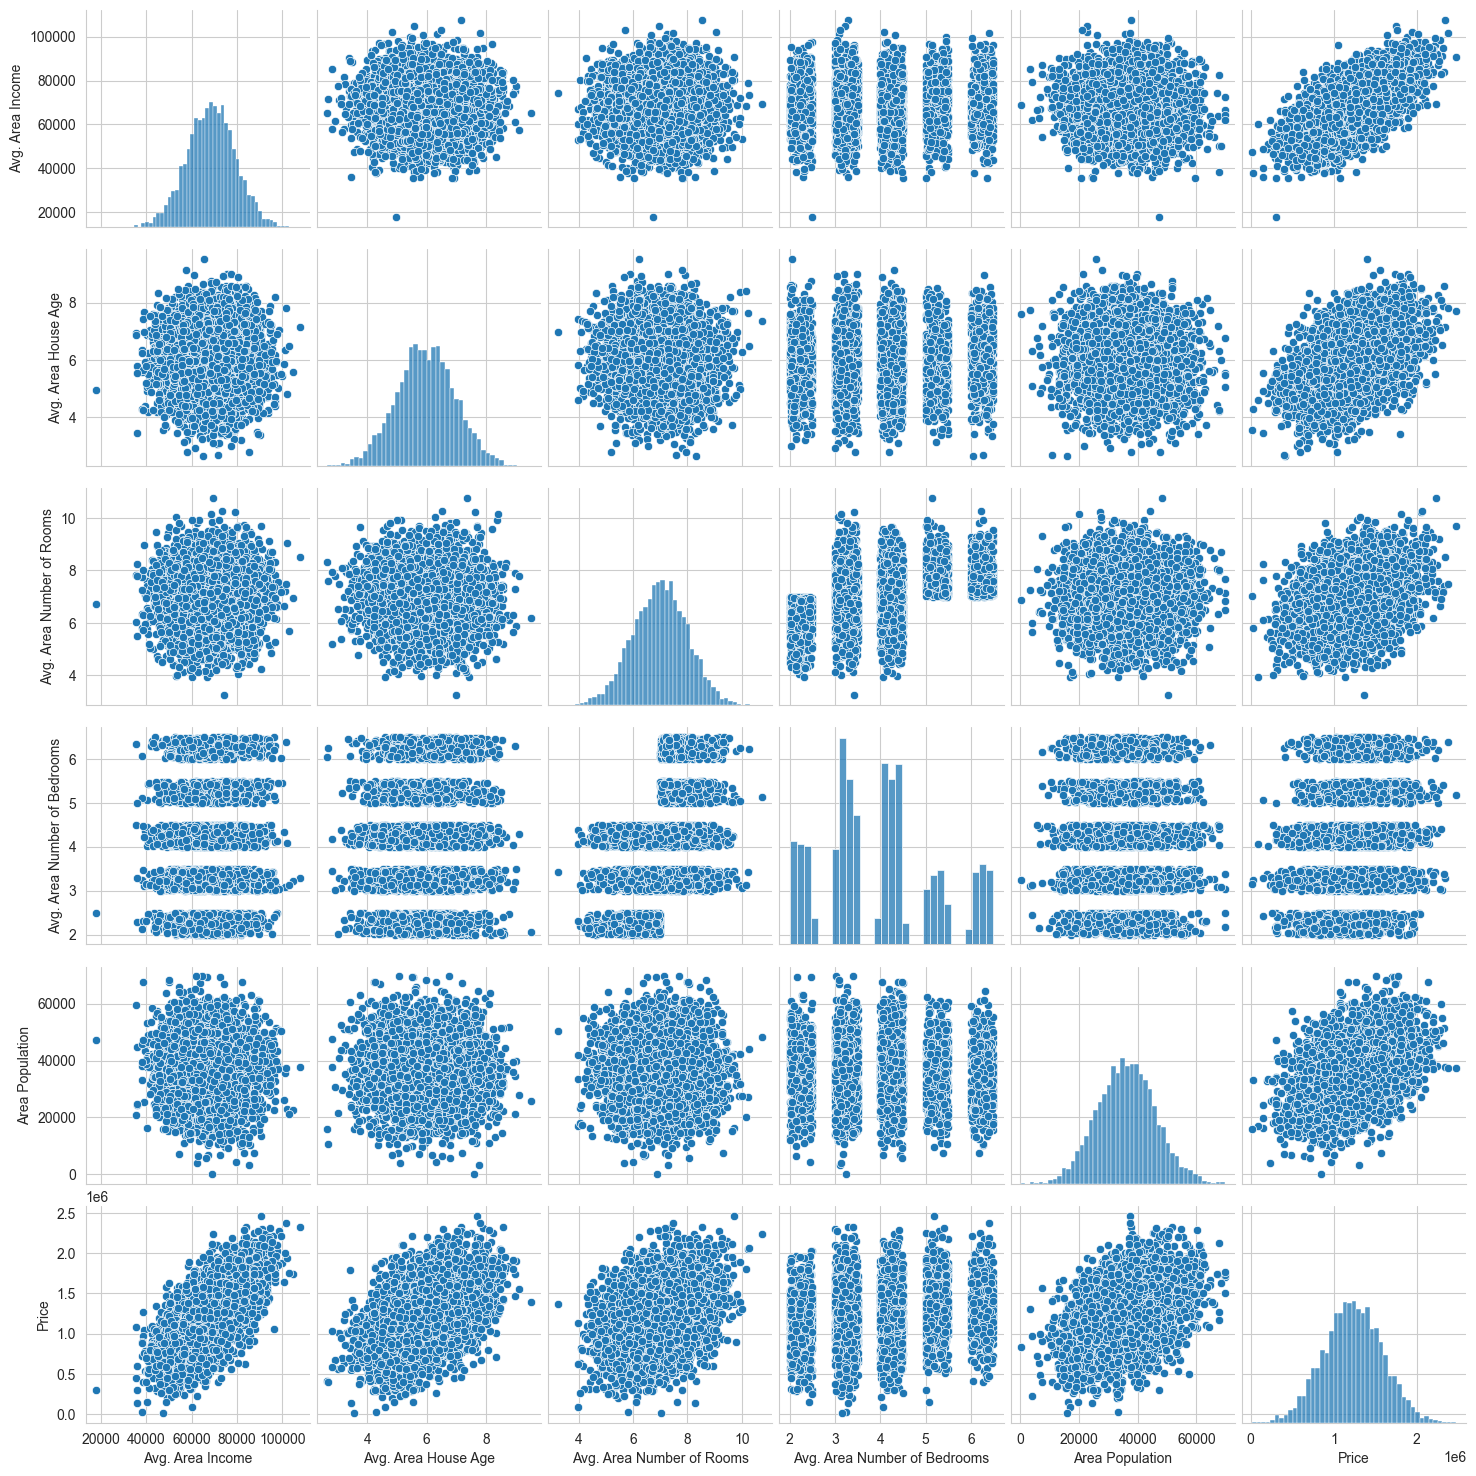

In [88]:
sns.pairplot(USA_Housing)

## **Distribution of Housing Price Across USA**

C:\Users\alber\AppData\Local\Temp\ipykernel_24668\341167752.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(USA_Housing.corr(), vmin=-1, vmax=1, annot=True, cmap="viridis")


<AxesSubplot: >

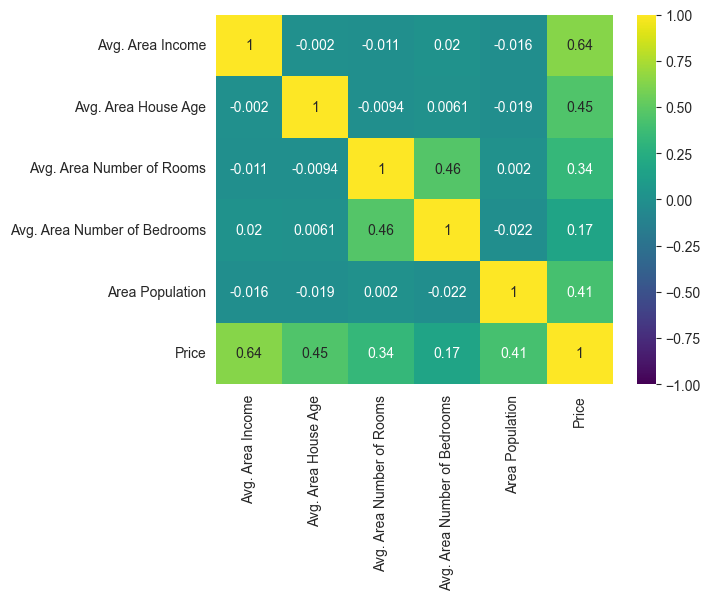

In [89]:
#Displaying correlation among all the columns 
sns.heatmap(USA_Housing.corr(), vmin=-1, vmax=1, annot=True, cmap="viridis")

## **Displaying correlation among all the columns using Heat Map**


## **Training a Linear Regression Model**

[](http://)We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [90]:
#Getting all Coulmn names
USA_Housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

y = a + b1*X + b2*X

In [91]:
# Columns as Features
X = USA_Housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [92]:
# Price is my Target Variable, what we trying to predict
y = USA_Housing['Price']

In [93]:
X.shape

(5000, 5)

In [94]:
y.shape

(5000,)

$$
price = \beta_0 + \beta_1 * Avg. Area Income + \beta_2 * Avg. Area House Age + \beta_3 * Avg. Area Number of Rooms + \newline \beta_4 * Avg. Area Number of Bedrooms + \beta_5 * Area Population
$$

## **Training the Model**

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.


In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=1,
                                                    shuffle=True)


In [96]:
print("TRAIN SIZE:", X_train.shape)
print("TEST SIZE:", X_test.shape)

print("TRAIN TARGET SIZE:", y_train.shape)
print("TEST TARGET SIZE:", y_test.shape)

TRAIN SIZE: (4000, 5)
TEST SIZE: (1000, 5)
TRAIN TARGET SIZE: (4000,)
TEST TARGET SIZE: (1000,)


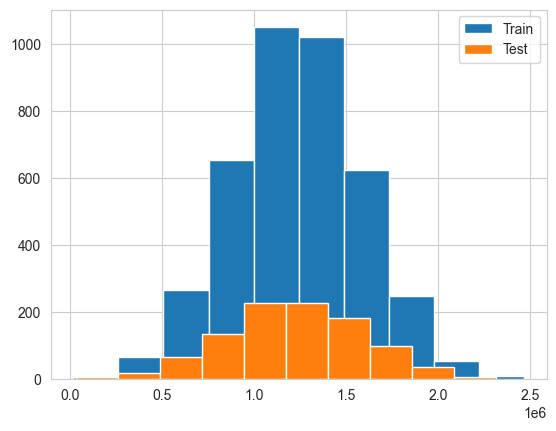

In [97]:
fig, ax = plt.subplots()
ax.hist(y_train, label = "Train")
ax.hist(y_test, label = "Test")
plt.legend()

In [98]:
#importing the Linear Regression Algorithm

from sklearn.linear_model import LinearRegression


In [99]:
#creating LinearRegression Object
model = LinearRegression()

In [100]:
#Training the Data Model
model.fit(X_train, y_train)

LinearRegression()

 ## **Model Evaluation**


Let's evaluate the model by checking out it's coefficients 

y = a + bX + ...

In [101]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [102]:
#Displaying the Intercept
model.coef_

array([2.16667346e+01, 1.64990052e+05, 1.20784238e+05, 1.54252468e+03,
       1.51503697e+01])

In [103]:
model.intercept_

-2637185.6400765292

**Interpreting the coefficients:**

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.62**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$165590.39**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$119827.78**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2361.09**.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.21**.


In [104]:
import statsmodels.api as sm

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     8826.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:10:39   Log-Likelihood:                -51756.
No. Observations:                4000   AIC:                         1.035e+05
Df Residuals:                    3994   BIC:                         1.036e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## **Predictions from our Model**

Let's grab predictions off our test set and see how well it did!

In [105]:
X_test

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
2764      75012.341660             6.742828                   6.604335   
4767      76187.273309             6.156222                   7.166149   
3814      67622.219611             5.813928                   5.071112   
3499      66933.165273             4.748787                   5.879803   
2735      65192.105635             6.275509                   8.017889   
...                ...                  ...                        ...   
448       66356.059961             7.480941                   6.725864   
921       68008.615434             4.357088                   7.879545   
4087     100741.298585             5.870726                   6.644853   
1242      62798.232983             5.890872                   6.481651   
2242      38868.250311             6.965104                   8.966906   

      Avg. Area Number of Bedrooms  Area Population  
2764                          4.10     42877.424147  
4767                          3.32     45084.394236  
3814                          4.16     35359.848465  
3499                          2.09     41834.042941  
2735                          4.47     26228.394577  
...                            ...              ...  
448                           3.19     38022.838199  
921                           5.41     28908.086785  
4087                          4.33     26041.487616  
1242                          3.05     34652.257887  
2242                          4.22     25432.076773  

[1000 rows x 5 columns]

In [106]:
y_hat = model.predict(X_test)

In [107]:
y_hat

array([1554219.15758779, 1582983.38777552,  941849.34298558,
        943752.69966423, 1183410.51047887,  330129.92089733,
       1927632.21182623, 1069922.75415198, 1648778.05625175,
       1073503.34526971,  626617.70408022, 1538963.80619363,
       1631224.37750862, 1054158.7843836 ,  961171.82968548,
       1234681.84695501, 1428653.8819133 ,  925913.80231812,
       1128251.49779401, 1159562.12629192, 1296553.3539227 ,
       1865297.38771497, 1183231.40918675, 1190862.36415844,
       1557482.8172526 , 1862543.1305476 ,  814308.00888961,
       1063737.59172595, 1226259.21094064,  661221.0338103 ,
        843011.58127811, 1636180.7512647 ,  665986.95400385,
       1117105.96876302,  800237.32653475, 1304234.70589713,
       1147460.64716757, 1349717.51027206, 1034432.05423632,
       1162747.68732538, 1413050.18413623, 1309555.41910429,
       1576626.16951798, 1300214.75676831,  848763.75151642,
        924167.81975248, 1229362.35978149, 1161822.4880928 ,
       1422081.7156418 ,

In [108]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

## **Residual Histogram**

**Ploting a histogram of the residuals and making sure it looks normally distributed.** If not, linear regression is nos appropiate for this analysis. Normally distribution of residuals is an assumption for Linear Regression.

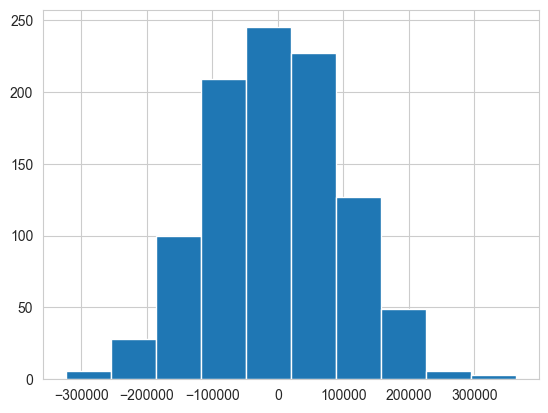

In [109]:
res = y_test - y_hat
plt.hist(res);

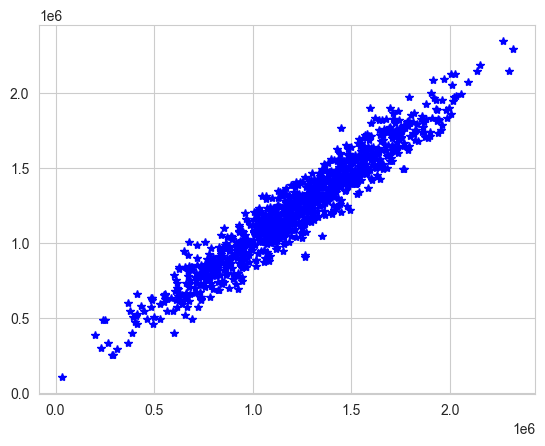

In [110]:
plt.plot(y_test, y_hat, 'b*')

In [111]:
np.corrcoef(y_test, y_hat)[0, 1] ** 2

0.9217624908764277

**Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error**

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

$$
MAE = \dfrac{1}{N}\sum{|y - \hat{y}|}
$$

In [112]:
def mae(x, y):
    return np.mean(np.abs(x - y))

mae_test = mae(y_test, y_hat)
print("MAE EN TEST:", mae_test, "$")

MAE EN TEST: 82494.7377012489 $


In [113]:
def mse(x, y):
    return np.mean((x - y)**2)

mse_test = mse(y_test, y_hat)
print("MSE EN TEST:", mse_test, "$^2")

MSE EN TEST: 10543597313.624573 $^2


In [114]:
def rmse(x, y):
    return np.sqrt(mse(x, y))
rmse_test = rmse(y_test, y_hat)
print("RMSE EN TEST:", rmse_test, "$")

RMSE EN TEST: 102682.02040096685 $


In [115]:
y_hat_train = model.predict(X_train)

mae_train = mae(y_train, y_hat_train)
print("MAE EN TRAIN:", mae_train, "$")

mse_train = mse(y_train, y_hat_train)
print("MSE EN TRAIN:", mse_train, "$^2")

rmse_train = rmse(y_train, y_hat_train)
print("RMSE EN TRAIN:", rmse_train, "$")

MAE EN TRAIN: 81076.25395181352 $
MSE EN TRAIN: 10141842650.259546 $^2
RMSE EN TRAIN: 100706.71601367778 $


In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_train = mean_absolute_error(y_train, y_hat_train)
mse_train = mean_squared_error(y_train, y_hat_train)
rmse_train = mean_squared_error(y_train, y_hat_train, squared=False)
r2_train = r2_score(y_train, y_hat_train)

mae_test = mean_absolute_error(y_test, y_hat)
mse_test =  mean_squared_error(y_test, y_hat)
rmse_test = mean_squared_error(y_test, y_hat, squared=False)
r2_test = r2_score(y_test, y_hat)


print("MAE EN TRAIN:", mae_train, "$")
print("MSE EN TRAIN:", mse_train, "$^2")
print("RMSE EN TRAIN:", rmse_train, "$")
print("R^2 EN TRAIN:", r2_train)
print("\n")
print("MAE EN TEST:", mae_test, "$")
print("MSE EN TEST:", mse_test, "$^2")
print("RMSE EN TEST:", rmse_test, "$")
print("R^2 EN TEST:", r2_test)

MAE EN TRAIN: 81076.25395181352 $
MSE EN TRAIN: 10141842650.259546 $^2
RMSE EN TRAIN: 100706.71601367778 $
R^2 EN TRAIN: 0.9170083707375688


MAE EN TEST: 82494.7377012489 $
MSE EN TEST: 10543597313.624573 $^2
RMSE EN TEST: 102682.02040096685 $
R^2 EN TEST: 0.9215935236936373


In [117]:
lm = LinearRegression()
lm.fit(X_train, y_train)
# R^2
lm.score(X_train, y_train) * 100 # Entrenamiento

91.70083707375689

In [118]:
lm.score(X_test, y_test) * 100  # Test

92.15935236936373

## Feature importance

In [119]:
def linear_model(arr, coefs, intercept):
    ls_coefs_data = list(map(lambda x, w: w*x, arr, coefs))
    return sum(ls_coefs_data) + intercept

linear_model(X_train.iloc[0], model.coef_, model.intercept_)

1315469.887283858

In [120]:
model.predict(X_train.iloc[0].values.reshape(1, -1))

c:\Users\alber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1315469.88728386])

<BarContainer object of 5 artists>

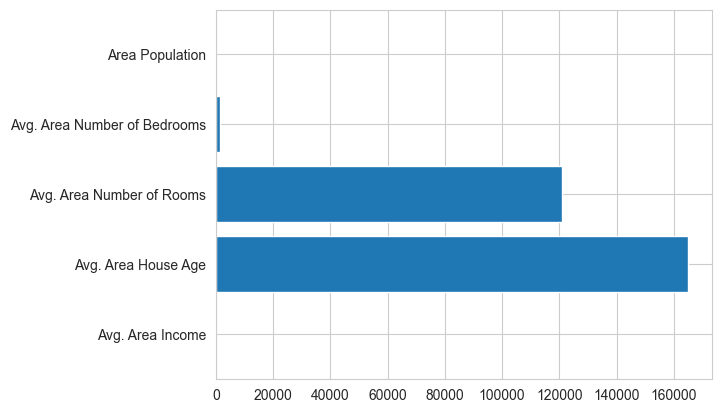

In [121]:
plt.barh(y=X_train.columns, width=model.coef_)

y = w1.X1 + w2.X2 + w3.X3

One extra room increases the price (Y) in 2300, and one extra dollar un area income increases price in 21. This is the meaning of the coefficents, bur **does it mean that the number of bedrooms is much important than the area income?**

Absolutly no. You must standarize the coefficents for better understanding the importance of each one. Two options:
1. Standarize features before training
2. Multiply each feature coefficent by it's standard deviation value and divide by the target standard deviation.

In [122]:
features = pd.DataFrame(X_train.columns, columns=["FeatureName"])
features

FeatureName
0              Avg. Area Income
1           Avg. Area House Age
2     Avg. Area Number of Rooms
3  Avg. Area Number of Bedrooms
4               Area Population

In [123]:
X_train.mean()

Avg. Area Income                68610.736586
Avg. Area House Age                 5.978699
Avg. Area Number of Rooms           6.989384
Avg. Area Number of Bedrooms        3.983932
Area Population                 36136.300895
dtype: float64

In [124]:
lm_sc = LinearRegression()

X_train_sc = X_train.copy()
mean_train = X_train.mean()
std_train = X_train.std()

X_train_sc = (X_train_sc - mean_train) / std_train

X_test_sc = X_test.copy()
X_test_sc = (X_test_sc - mean_train) / std_train

lm_sc.fit(X_train_sc, y_train)

LinearRegression()

In [128]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc_2 = sc.fit_transform(X_train)
X_test_sc_2 = sc.transform(X_test)

(X_test_sc - X_test_sc_2).sum().sum()

0.0031534695891213506

<BarContainer object of 5 artists>

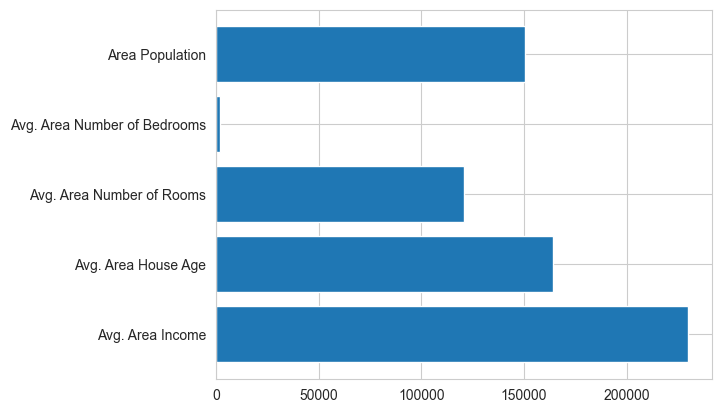

In [75]:
plt.barh(y=X_train.columns, width=lm_sc.coef_)

In [76]:
y_hat_train = lm_sc.predict(X_train_sc)
y_hat = lm_sc.predict(X_test_sc)

mae_train = mean_absolute_error(y_train, y_hat_train)
mse_train = mean_squared_error(y_train, y_hat_train)
rmse_train = mean_squared_error(y_train, y_hat_train, squared=False)
r2_train = r2_score(y_train, y_hat_train)

mae_test = mean_absolute_error(y_test, y_hat)
mse_test =  mean_squared_error(y_test, y_hat)
rmse_test = mean_squared_error(y_test, y_hat, squared=False)
r2_test = r2_score(y_test, y_hat)


print("MAE EN TRAIN:", mae_train, "$")
print("MSE EN TRAIN:", mse_train, "$^2")
print("RMSE EN TRAIN:", rmse_train, "$")
print("R^2 EN TRAIN:", r2_train)
print("\n")
print("MAE EN TEST:", mae_test, "$")
print("MSE EN TEST:", mse_test, "$^2")
print("RMSE EN TEST:", rmse_test, "$")
print("R^2 EN TEST:", r2_test)

MAE EN TRAIN: 81076.2539518122 $
MSE EN TRAIN: 10141842650.259546 $^2
RMSE EN TRAIN: 100706.71601367778 $
R^2 EN TRAIN: 0.9170083707375688


MAE EN TEST: 82494.73770125785 $
MSE EN TEST: 10543597313.625992 $^2
RMSE EN TEST: 102682.02040097376 $
R^2 EN TEST: 0.9215935236936268


In [ ]:
import matplotlib.pyplot as plt
features = features.sort_values('importance_standarized', ascending=True)
plt.barh(features.index, features.importance_standarized);

## Removing noise
Let's try a new model without the `Avg. Area Number of Bedrooms`

In [78]:
X = USA_Housing[['Avg. Area Income', 'Avg. Area House Age',
                 'Avg. Area Number of Rooms', 'Area Population']]

y = USA_Housing['Price']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1)

lm = LinearRegression() 
lm.fit(X_train, y_train)

predictions = lm.predict(X_test)
predictions

# A little bit lower without Avg. Area Number of Bedrooms
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R^2:', r2_score(y_test, predictions))

MAE: 82489.5343129288
MSE: 10548575810.034224
RMSE: 102706.25983860099
R^2: 0.9215565015702412
